# Exercise 1.1.3: Law of Large Numbers

## 1. Proposal of a 2D random variable Z = (X, Y)

Definition of a random variable Z composed of two real physical quantities:
- X: Height of an individual (in cm).
- Y: Weight of an individual (in kg).

The Expectation (or expected mean value) of Z, denoted as E[Z], is arbitrarily fixed for this exercise:
- E[X] = 170 cm
- E[Y] = 70 kg

Vector E[Z] = [170, 70].

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Définition de l'espérance théorique E[Z]
expected_value = np.array([170, 70])

print(f"Espérance E[Z] définie : {expected_value} (Taille en cm, Poids en kg)")

Espérance E[Z] définie : [170  70] (Taille en cm, Poids en kg)


## 2. Sampling and Visualization

Drawing n samples from a normal distribution centered on expectation E[Z].
The normal distribution is defined by its mean (loc) and standard deviation (scale).

Simulation parameters:
- Sample size n = 500
- Height standard deviation: 10 cm
- Weight standard deviation: 15 kg

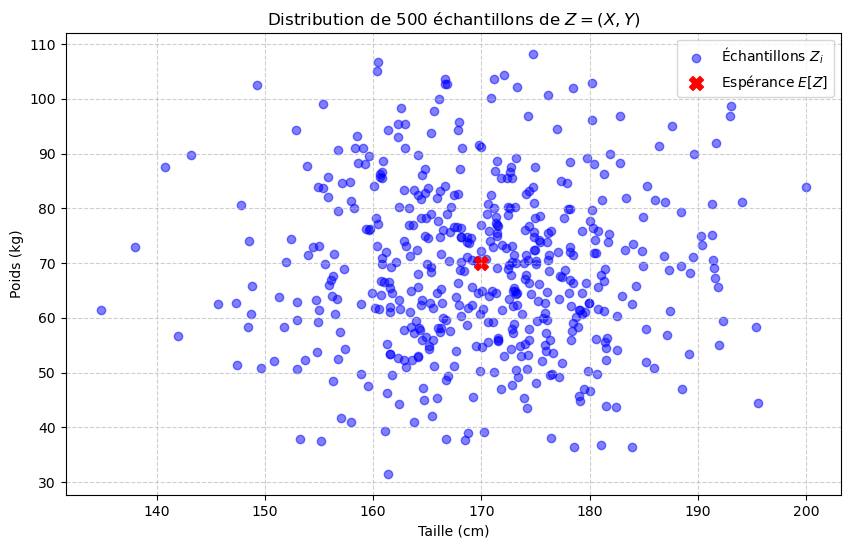

In [ ]:
n = 500

# Génération des données aléatoires
X = np.random.normal(loc=170, scale=10, size=n) # Distributions des tailles
Y = np.random.normal(loc=70, scale=15, size=n)  # Distribution des poids

# Création de la variable Z (matrice de n lignes et 2 colonnes)
Z = np.column_stack((X, Y))

# Visualisation des n points
plt.figure(figsize=(10, 6))

# Nuage de points des échantillons
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5, label='Échantillons $Z_i$', color='blue')

# Affichage de l'Espérance E[Z]
plt.scatter(expected_value[0], expected_value[1], color='red', s=100, marker='X', label='Espérance $E[Z]$')

plt.title(f'Distribution de {n} échantillons de $Z = (X, Y)$')
plt.xlabel('Taille (cm)')
plt.ylabel('Poids (kg)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 3. Empirical Mean and Convergence

The law of large numbers states that the empirical mean of a sequence of random variables converges to their expectation as the number of samples $n$ approaches infinity.

### Method
1. For each k from 1 to n, take the subset of the first k samples.
2. Calculate the empirical mean Z_k of this subset.
3. Calculate the Euclidean distance between this empirical mean Z_k and the theoretical expectation E[Z].
4. Plot the evolution of this distance as a function of k.


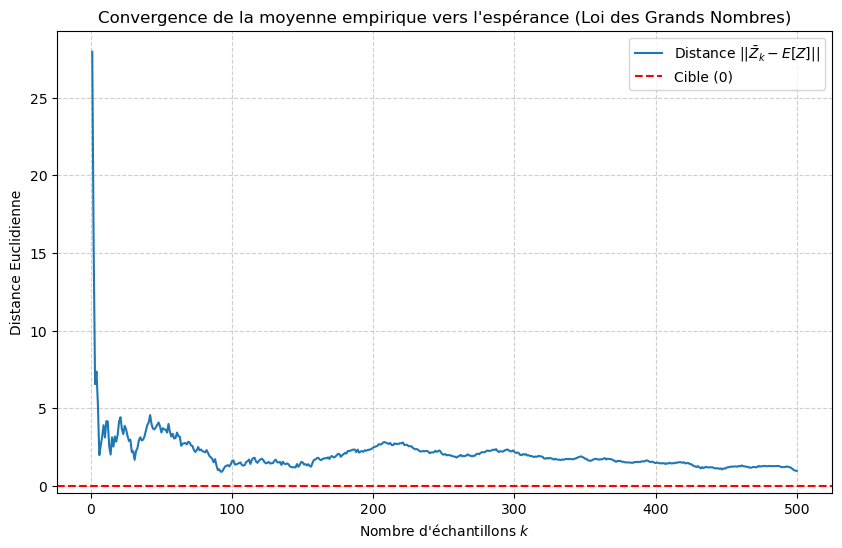

In [ ]:
distances = []
indices = np.arange(1, n + 1)

for k in indices:
    # Sélection des k premiers échantillons
    Z_k = Z[:k]

    # Calcul de la moyenne empirique (moyenne sur les colonnes axis=0)
    empirical_mean = np.mean(Z_k, axis=0)

    # Calcul de la distance euclidienne || Moyenne_Empirique - Espérance ||
    distance = np.linalg.norm(empirical_mean - expected_value)

    distances.append(distance)

# Visualisation de la convergence
plt.figure(figsize=(10, 6))
plt.plot(indices, distances, label='Distance $|| \\bar{Z}_k - E[Z] ||$')
plt.axhline(y=0, color='red', linestyle='--', label='Cible (0)')

plt.title('Convergence de la moyenne empirique vers l\'espérance (Loi des Grands Nombres)')
plt.xlabel("Nombre d'échantillons $k$")
plt.ylabel('Distance Euclidienne')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()